In [19]:
import numpy as np # used for linear algebra calcs
import pandas as pd # data processing

In [21]:
df = pd.read_csv('/parkinsondata.zip') # so, what does this do?
#pretty much, this is making a dataframe out of this dataset, and we're using pandas to read this dataframe.
#pretty much, setting up to analyze the data
df.tail() #shows last couple rows
df.head() # shows first couple rows
print("Okay, so to recap on what's happening here - pretty much we have a dataset with a lot of sound data from someone with Parkinson's and now we're going to analyze it to see any possible causes and detection metrics for the disease!")

Okay, so to recap on what's happening here - pretty much we have a dataset with a lot of sound data from someone with Parkinson's and now we're going to analyze it to see any possible causes and detection metrics for the disease!


In [22]:
df.describe() # Describing the dataset's features.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [23]:
df['D2'].mean() # take the mean or value of a specific part of the data
df['D2'].describe()

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64

In [24]:
features = df.loc[:, df.columns != 'status'].values[:, 1:] # values use for array format
#if you went [:] for the columns too, then it would take the name values, which aren't numerical, which wouldn't work.
#df.loc means to locate the specific columns are rows to use
#the first one is for the rows, and the second one is for the commas.
#pretty much it's saying use all of the rows and for the columns use everything but status
#the values at the end pretty much means that for rows to use all of the values, and for columns to use everything from the second column and onwards ( remember that it all starts at index 0), so it's inclusive of 1
print('why do we want a features array though? Pretty much, a features array limits our data to the ones that we WANT to use/relevant columns')

why do we want a features array though? Pretty much, a features array limits our data to the ones that we WANT to use/relevant columns


In [ ]:
labels=df.loc[:,'status'].values # creating a new array, which is filled with the status labels and taking ALL the values
#in machine learning, it's all about assessing correlations in a sense
#the features are the predictors and the labels are the assigned things that should match with ( the result/goal )

In [ ]:
#returning people with/without parkinson's
#1- with
#0 - without
df['status'].value_counts()#selects from the status column, and outputs any unique values from the column

status
1    147
0     48
Name: count, dtype: int64

In [25]:
#import MinMaxScaler class from sklearn.preprocessing
#sklearn - machine learning library! makes machine learning programming easier through functions
#MinMaxScaler - library that supports transforming features to a range (sizes are important!)

from sklearn.preprocessing import MinMaxScaler # imports the functions specifically from the library

In [ ]:
#  Initialize MinMax Scaler classs for -1 to 1

Scaler = MinMaxScaler((-1, 1)) # pretty much what this is doing is it scales the values between -1,1 and it's a method



#  Fit the scaler to the features and transform them
X = Scaler.fit_transform(features) # scaling the features down !!

#  Get the labels
y = labels

#  Show X and y
print(X, y)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# import train_test_split from sklearn.
# separates testing and training data

from sklearn.model_selection import train_test_split # getting ready to split training and testing data

In [ ]:
#remember da split - 20% testing and 80% training

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
#x_train ( features to train )
#X_test ( features to test )
#x_train ( labels to train )
#X_test ( labels to test )
#test_size means 20% of the data is used for testing

NameError: name 'train_test_split' is not defined

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 1000) #n_estimators is how many decision trees
rfcl = rfcl.fit(x_train, y_train) #fitting the model based off of the training data (training the model)

y_pred = rfcl.predict(x_test)#testing the model
rfcl.score(x_test , y_test) #how accurate the model is after the testing

NameError: name 'x_train' is not defined

In [ ]:
count_misclassified=(y_test!=y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))



Misclassified samples in Random Forest: 4


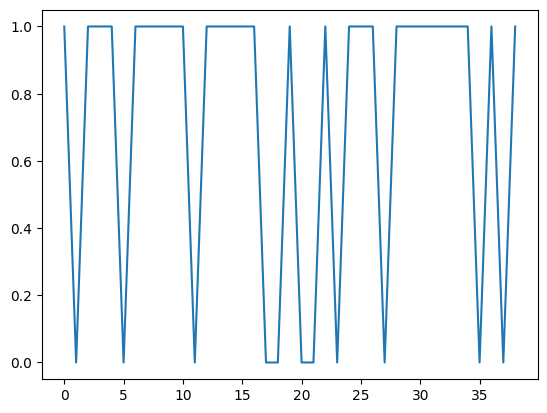

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)

In [ ]:
plt.plot(y_pred)

NameError: name 'plt' is not defined